

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


I take tmdb-movies dataset to analyze the movies industry and the investment in movies for companies and to measure the most preferred movies geners to the watchers, then I gave the below 2 questions:
1. What are the movies geners that have the highest revenue?
2. What is the most producing year of movies?



In [11]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import pandas as p
import matplotlib.pyplot as matp
%matplotlib inline
import numpy as n
import csv



<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

v =p.read_csv('tmdb-movies.csv') 

v.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09




### Data Cleaning (Replace this with more specific notes!)


I follow the below steps to clean data by remvoing the outliers:
-  Remove all movies where the budget is less than 10000 USD
- Remove all movies where the revenue is less than 10000 USD
- Remove all movies where its duration runtime less than 30 minutes
- Split the keywords column to get the first keyword
- Split the geners column to get the first genre

In [3]:

# Remove all movies where the budget is less than 10000 USD
operator=v[v['budget']<10000].index
v.drop(operator , inplace=True)


# Remove all movies where the revenue is less than 10000 USD
operator=v[v['revenue']<10000].index
v.drop(operator , inplace=True)


# Remove all movies where its duration runtime less than 30 minutes
operator=v[v['runtime']<30].index
v.drop(operator , inplace=True)

#Split the keywords column to get the first keyword
v['keywords']=v['keywords'].str.split('|',n=1,expand=True)

# Split the genres column to get the first genre
v['genres']=v['genres'].str.split('|',n=1,expand=True)

v.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (Replace this header name!)

Question 1:  
- What are the movies geners that have the highest revenue? And what is the distribution of highest revenue geners?
 - To answer this question I will calculate the revenue of movie grouped by geners.

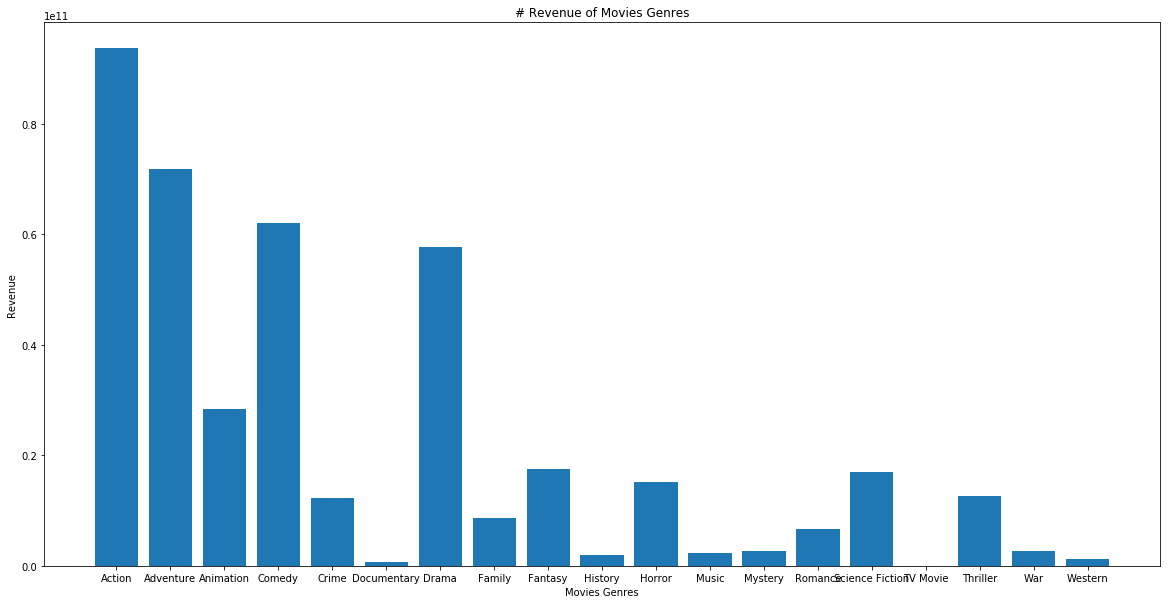

In [5]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

val=v.groupby('genres')['revenue'].sum()
loc=val.index
matp.figure(figsize=(20,10))
matp.bar(loc,val)
matp.title('# Revenue of Movies Genres')
matp.xlabel('Movies Genres')
matp.ylabel('Revenue')
matp.show()

As per the bar chart above, I found that the Action geners is the highest revenue compared to other geners, I will create new data frame in order to include reocords of Action geners only, then I will plot depending on the release year using histogram to represent the distribution.

Text(0,0.5,'Count of Movies')

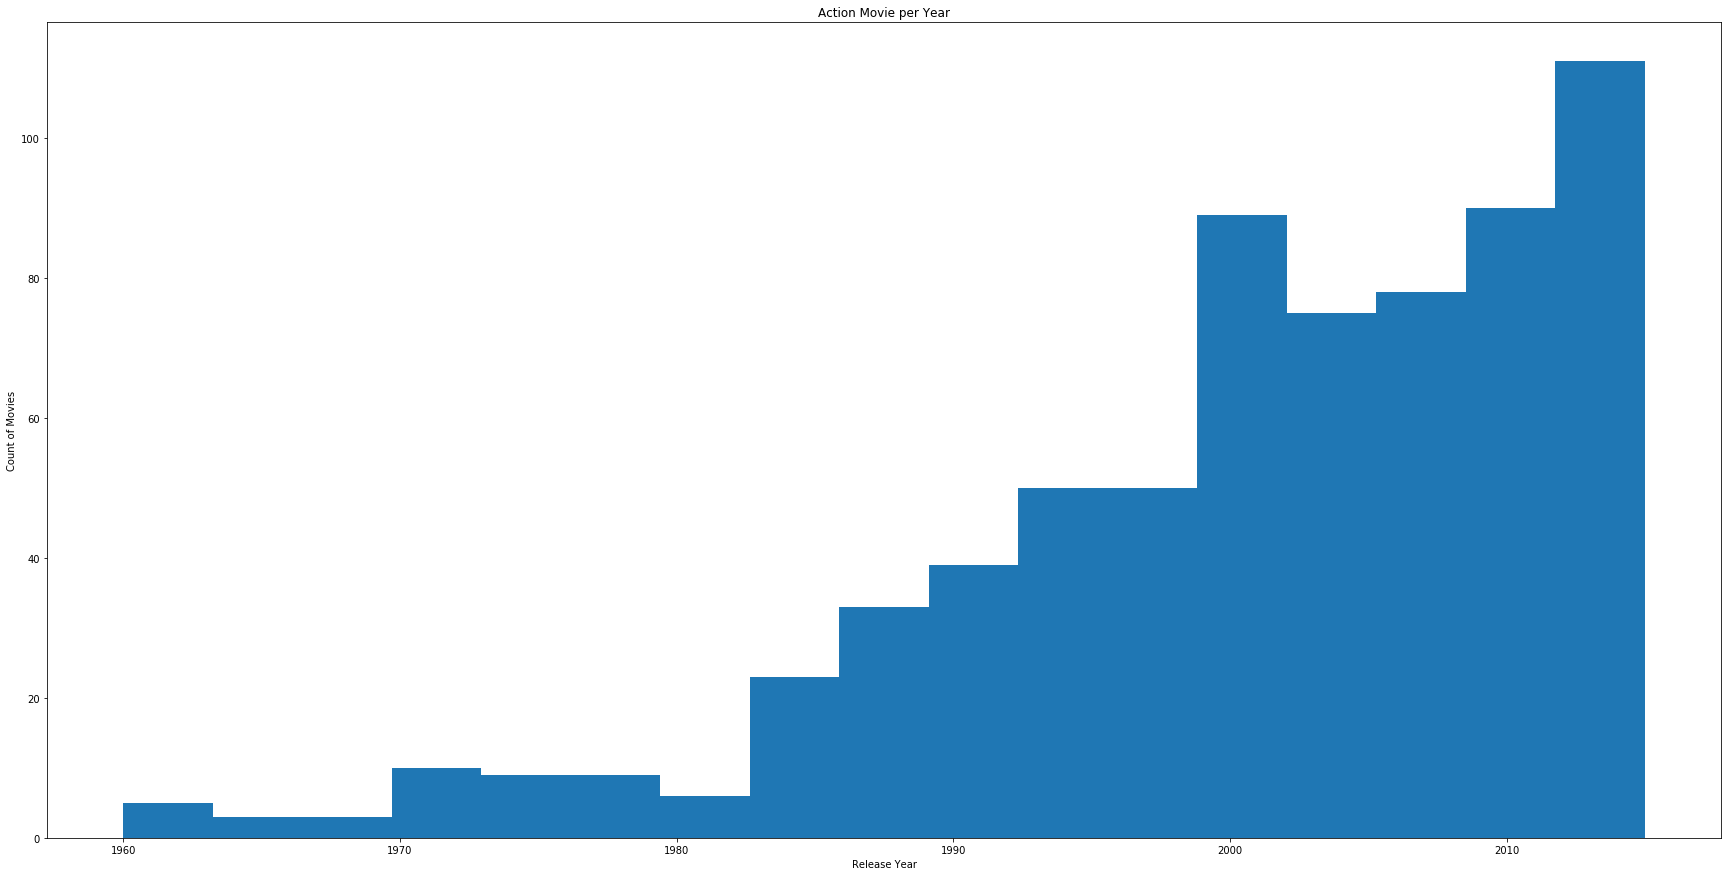

In [8]:
v2=v[v['genres']=='Action']
matp.figure(figsize=(30,15))
matp.hist(v2['release_year'],bins='auto')
matp.title('Action Movie per Year')
matp.xlabel('Release Year')
matp.ylabel('Count of Movies')

The analysis of Question 1:
Based on the bar chart: I see that the revenue of action movies is higher than other geners in the history of movies as per the imdb data, this give me an indicator that the people prefer watching the action movie more than other geners.
Based on the histogram: I see that the revenue of action movies was low before 1990 but after 2010 I see there is jump in the revenue and give me an indicator that watchers become prefer action movies so the producing companies doubled their investements in this geners.

### Research Question 2  (Replace this header name!)

Question 2: 
- What is the most producing year of movies?

Text(0,0.5,'Count of Movies')

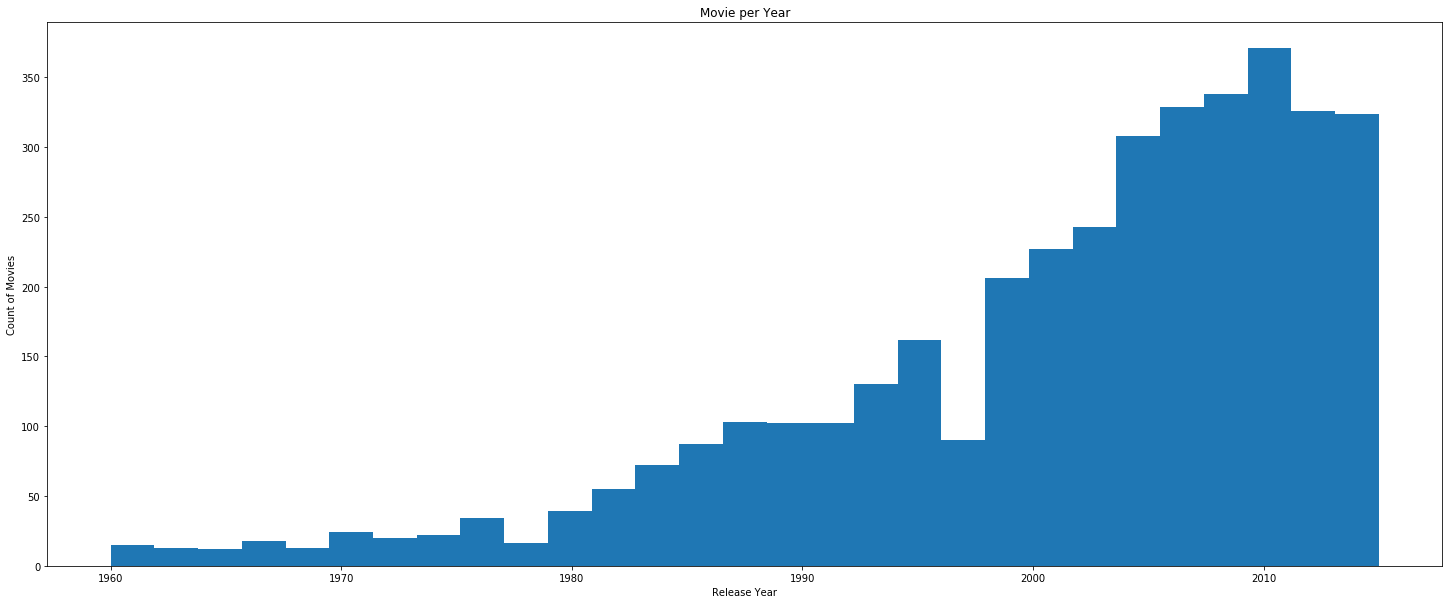

In [10]:

# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
#values=df1.groupby('release_year')['id'].count()
#locations=values.index
matp.figure(figsize=(25,10))
matp.hist(v['release_year'],bins='auto')
matp.title('Movie per Year')
matp.xlabel('Release Year')
matp.ylabel('Count of Movies')

The analysis of Question 2:
2011 is the most producing year of movies regardless the genre, 193 movies have been produced on 2011, this give me an andicator that the production companies have good budget and good economic situation on 2011.

<a id='conclusions'></a>
## Conclusions
Limitations:
The data was enough to me but there is some outliers example:
1- the budget of some movies was not accurate example 1 USD!! so I removed all movies where the budget is less than 10000 USD
2- the revenue of some movies was not accurate, so I removed all movies where the revenue is less than 10000 USD
3- Split the keywords and geners column to get an accurate value.
The conlusion of my project that:
1- The revenue of action movies is higher than other genres in the history of movies which is preferred investement to pruduction companies.
2- The year 2011 is the most producing year of movies regardless the genre, this is andicator that the production companies have good budget and good economic situation on 2011.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])